<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/ML_Class_4_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#support vector machine
import sys
assert sys.version_info>=(3,5)

In [ ]:
import sklearn
assert sklearn.__version__>="0.20" #dundee version

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
np.random.seed(42)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.svm import SVC
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()
X=iris["data"][:,(2,3)]
y=iris["target"]

In [ ]:
setosa_or_versicolor=(y==0)|(y==1)#|:pipe operator
X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]

In [ ]:
svm_clf=SVC(kernel='linear', C=float("0.1"))
svm_clf.fit(X,y)
y_pred = svm_clf.predict(X)
print("Accuracy: ", accuracy_score(y,y_pred))

Accuracy:  1.0


(0.0, 5.5, 0.0, 2.0)

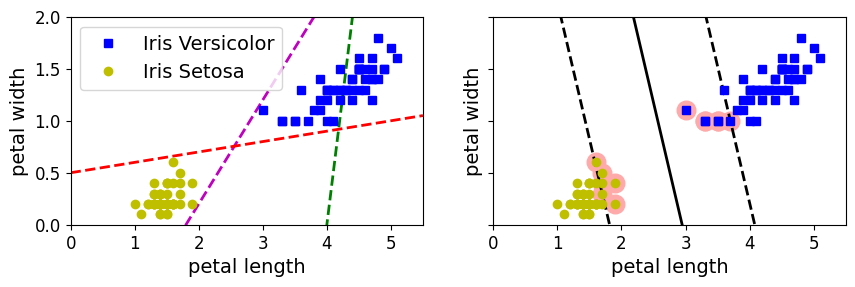

In [ ]:
x0=np.linspace(0,5.5,200)
pred_1=5*x0-20
pred_2=x0-1.8
pred_3=0.1*x0+0.5

def plot_svc_decision_boundary(svm_clf,xmin,xmax):
  w=svm_clf.coef_[0]
  b=svm_clf.intercept_[0]

  x0=np.linspace(xmin,xmax,200)
  decision_boundary=-w[0]/w[1]*x0-b/w[1]

  margin=1/w[1]
  gutter_up=decision_boundary+margin
  gutter_down=decision_boundary-margin

  svs=svm_clf.support_vectors_
  plt.scatter(svs[:,0],svs[:,1],s=180,facecolor='#FFAAAA')
  plt.plot(x0,decision_boundary,"k-",linewidth=2)
  plt.plot(x0,gutter_up,"k--",linewidth=2)
  plt.plot(x0,gutter_down,"k--",linewidth=2)

fig,axes=plt.subplots(ncols=2,figsize=(10,2.7),sharey=True)

plt.sca(axes[0])
plt.plot(x0,pred_1,"g--",linewidth=2)
plt.plot(x0,pred_2,"m--",linewidth=2)
plt.plot(x0,pred_3,"r--",linewidth=2)
plt.plot(X[:,0][y==1],X[:,1][y==1],"bs",label="Iris Versicolor")
plt.plot(X[:,0][y==0],X[:,1][y==0],"yo",label="Iris Setosa")
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.axis([0.0,5.5,0,2])
#all instances off the street and on right hand side - hard margin classification(hmc)
#problems with hmc are:
#linearly separable
#sensitive to outliers

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf,0,5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],"bs")
plt.plot(X[:,0][y==0],X[:,1][y==0],"yo")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.axis([0,5.5,0,2])

In [ ]:
Xs=np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float64)
ys=np.array([0,0,1,1])
svm_clf=SVC(kernel="linear",C=100)
svm_clf.fit(Xs,ys)

SVC(C=100, kernel='linear')

(-2.0, 2.0, -2.0, 2.0)

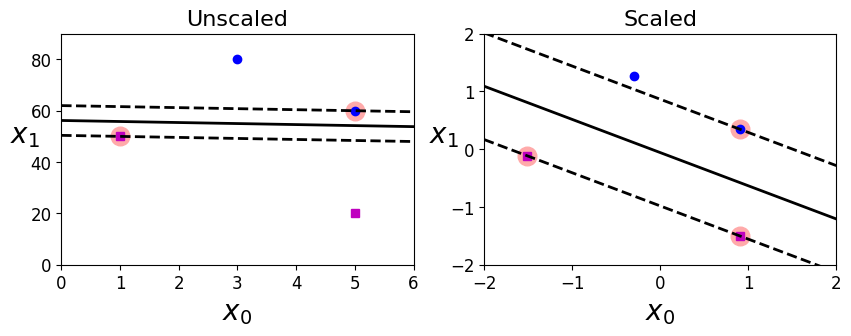

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(Xs[:,0][ys==1],Xs[:,1][ys==1],"bo")
plt.plot(Xs[:,0][ys==0],Xs[:,1][ys==0],"ms")
plot_svc_decision_boundary(svm_clf,0,6)
plt.xlabel("$x_0$",fontsize=20)
plt.ylabel("$x_1$",fontsize=20,rotation=0)
plt.title("Unscaled",fontsize=16)
plt.axis([0,6, 0,90])

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(Xs)
svm_clf.fit(X_scaled,ys)
plt.subplot(122)
plt.plot(X_scaled[:,0][ys==1],X_scaled[:,1][ys==1],"bo")
plt.plot(X_scaled[:,0][ys==0],X_scaled[:,1][ys==0],"ms")
plot_svc_decision_boundary(svm_clf,-2,2)
plt.xlabel("$x_0$",fontsize=20)
plt.ylabel("$x_1$",fontsize=20,rotation=0)
plt.title("Scaled",fontsize=16)
plt.axis([-2,2, -2,2])


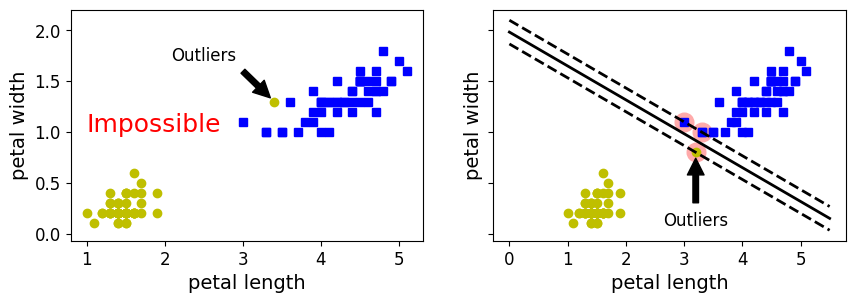

In [ ]:
X_outliers=np.array([[3.4,1.3],[3.2,0.8]])
y_outliers=np.array([0,0])
Xo1=np.concatenate([X,X_outliers[:1]], axis=0)
yo1=np.concatenate([y,y_outliers[:1]], axis=0)
Xo2=np.concatenate([X,X_outliers[1:]], axis=0)
yo2=np.concatenate([y,y_outliers[1:]], axis=0)

svm_clf2=SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2,yo2)

fig,axes=plt.subplots(ncols=2,figsize=(10,3),sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:,0][yo1==1],Xo1[:,1][yo1==1],"bs")
plt.plot(Xo1[:,0][yo1==0],Xo1[:,1][yo1==0],"yo")
plt.text(1.0,1.0,"Impossible",fontsize=18,color="red")
plt.ylabel("petal width",fontsize=14)
plt.xlabel("petal length",fontsize=14)
plt.annotate("Outliers",xy=(X_outliers[0][0],X_outliers[0][1]),
              xytext=(2.5,1.7),
              ha="center",
              arrowprops=dict(facecolor='black',shrink=0.1),
              fontsize=12,
             )

plt.axis=([0,5.5, 0,2])

plt.sca(axes[1])
plt.plot(Xo2[:,0][yo2==1],Xo2[:,1][yo2==1],"bs")
plt.plot(Xo2[:,0][yo2==0],Xo2[:,1][yo2==0],"yo")
plot_svc_decision_boundary(svm_clf2,0,5.5)

plt.ylabel("petal width",fontsize=14)
plt.xlabel("petal length",fontsize=14)
plt.annotate("Outliers",xy=(X_outliers[1][0],X_outliers[1][1]),
              xytext=(3.2,0.08),
              ha="center",
              arrowprops=dict(facecolor='black',shrink=0.1),
              fontsize=12,
             )

plt.axis=([0,5.5, 0,2])